# PROJECT - Zomato API 2

## 1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India

#### In the following cell, I have 
1. Imported all the necessary libraries for this project which are numpy, pandas, matplotlib.pyplot, requests, json

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import json

#### In the following cell, I have 
1. Initialised the dataframe with the provided csv file
2. Updated the dataframe with only Indian restaurants with the help of country code(for India country code is 1)
3. Updated the city name for cities(New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad, Delhi-NCR) to Delhi-NCR as per question

In [ ]:
dataframe = pd.read_csv("zomato.csv", encoding='ISO-8859-1')
df = dataframe.copy()

df = df[df["Country Code"] == 1]

delhiNcrList = ["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad",'Delhi-NCR']
for city in delhiNcrList:
    df.loc[df.City == city, "City"] = 'Delhi-NCR'

#### In the following cell, I have
1. Initialised a new list(allCities) with all the cities in the dataframe
2. Converted the list(allCities) to a numpy array(npallCities)
3. Initialised two variables with value 0 for taking count of restaurants inside and outside Delhi-NCR (countDelhiNcr,countRestofIndia)
4. Iterated over the numpy array(npallCities), checked the city value and added value 1 to the respective count variable whenever its condition is satisfied
5. Plotted a bar graph with the count obtained from the above step

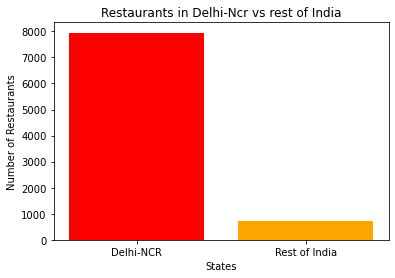

Restaurants in Delhi-NCR : 7947
Restaurants in Rest of India : 705


In [32]:
allCities = []
for row in df.City:
    allCities.append(row)
npallCities = np.array(allCities)

countDelhiNcr = 0
countRestofIndia = 0
for city in npallCities:
    if city == "Delhi-NCR":
        countDelhiNcr +=1
    else:
        countRestofIndia +=1

plt.bar(["Delhi-NCR", "Rest of India"],[countDelhiNcr,countRestofIndia], color=["red","orange"])
plt.xlabel("States")
plt.ylabel("Number of Restaurants")
plt.title("Restaurants in Delhi-Ncr vs rest of India")
plt.show()
print("Restaurants in Delhi-NCR :",countDelhiNcr)
print("Restaurants in Rest of India :",countRestofIndia)

#### Observation
We can see that there are more than 10 times restaurants in Delhi-NCR than rest of India. 
There are 7947 restaurants in Delhi-NCR compared to only 705 restaurants in Rest of India.
#### Analysis
This maybe because of the fact that the dataset is highly skewed toward the cities included in Delhi-NCR.

### 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

### Used the provided dataset
#### In the following cell, I have
1. Cleaned the cuisine data by removing null entries, if any
2. Created a empty list(cuisinesInDelhiNcr) for entering all the cuisines in Delhi-NCR.
3. Itreated over cuisines where city is Delhi-NCR, split it on the basis of comma(for getiing multiple cuisine name as different entry to list, if exists) and also stripped them (for removing empty spaces)
4. Converted the list(cuisinesInDelhiNcr) to a set for retaining only distinct values and removing all the duplicates.
5. Repeated steps 2,3 and 4 for outside Delhi-NCR. Here list(and then later converted to set) name is cuisinesInRestOfIndia
6. performed set subtraction(cuisinesInRestOfIndia - cuisinesInDelhiNcr) to get all the cuisines which are available outside of Delhi-NCR but not inside and stored it in another set(notInDelhiNcr)
7. Itreated over the set(notInDelhiNcr) and printed them

In [4]:
df = df.loc[df.Cuisines.notnull()]

cuisinesInDelhiNcr = []
for row in df.loc[df.City == "Delhi-NCR","Cuisines"]:
    for cuisine in row.split(","):
        cuisinesInDelhiNcr.append(cuisine.strip())
cuisinesInDelhiNcr = set(cuisinesInDelhiNcr)

cuisinesInRestOfIndia = []
for row in df.loc[df.City != "Delhi-NCR","Cuisines"]:
    for cuisine in row.split(","):
        cuisinesInRestOfIndia.append(cuisine.strip())
cuisinesInRestOfIndia = set(cuisinesInRestOfIndia)

notInDelhiNcr = cuisinesInRestOfIndia - cuisinesInDelhiNcr
print("Cuisines not available in Delhi-NCR, acc. to the dataset:")
for cuisine in notInDelhiNcr:
    print(cuisine)

Cuisines not available in Delhi-NCR, acc. to the dataset:
Malwani
BBQ
German
Cajun


#### Observation
According to provided dataset, there are 4 such cuisines that are available outside Delhi-NCR but not inside Delhi-NCR 
These cuisines are Malwani, BBQ, German, Cajun

### Used the zomato API
#### In the following cell, I have
1. Initialied a dictionary(params) with key (city_id) for passing it as an argument for params=
2. Initialied a dictionary(headers) with keys (user-key and accept) for passing it as an argument for headers=
3. Requested a get call to zomato API with headers and params as arguments
4. Parsed the json response and coverted it to python, and stored it in a variable(pData)
5. Created an empty list(cuisinesInDelhiNcrAPI) for storing the all cuisines in Delhi-NCR obtained with API
6. Identified and itrated over pData(cuisines), appended cuisine name to list(cuisinesInDelhiNcrAPI)
7. Converted the list(cuisinesInDelhiNcrAPI) to set for retaining only distinct values
8. Itrated over this list(cuisinesInDelhiNcrAPI) and checked if they exist in the list(notInDelhiNcr), printed them if exists

In [5]:
params = {"city_id":"1"}
headers ={"user-key":"627c28c07ad221c65491bbffea6f5d54","Accept": "application/json"}
response = requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers = headers,params=params)
pData = response.json()

cuisinesInDelhiNcrAPI = []
for i in pData["cuisines"]:
    cuisinesInDelhiNcrAPI.append(i['cuisine']['cuisine_name'])
cuisinesInDelhiNcrAPI = set(cuisinesInDelhiNcrAPI)
print("Cuisines which are not in Delhi-NCR according to the dataset, but these are actually available :", end=" ")
for i in cuisinesInDelhiNcrAPI:
    if i in notInDelhiNcr:
        print(i)

Cuisines which are not in Delhi-NCR according to the dataset, but these are actually available : BBQ


#### Observation
According to zomato API, there is one such cuisine(BBQ) that is actually available in Delhi-NCR but the dataset showed that this cuisine isnt available in Delhi-NCR.
#### Analysis
The difference in the observation from provided dataset and the API suggests that the dataset haven't been recently updated. 

### 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

#### In the following cell, I have
1. Created a list(allCuisinesInDelhiNcr) 
2. Itreated over cuisines where city is Delhi-NCR, split it on the basis of comma(for getiing multiple cuisine name as different entry to list, if exists) and also stripped them (for removing empty spaces)
3. Created a dictionary(countDelhiCuisines)
4. Itreated over the list(allCuisinesInDelhiNcr) and updated the dictionary value by 1 for new entry and added 1 to present value for existing key
5. Created two lists(allCuisinesInDelhiNcrfromdict, timesCuisinesInDelhiNcrfromdict) 
6. Itreated over keys of dictionary(countDelhiCuisines), appended key to allCuisinesInDelhiNcr,appended its value to timesCuisinesInDelhiNcrfromdict
7. Converted the above two lists into numpy array, sorted them in descending order based on the values in list(timesCuisinesInDelhiNcrfromdict)
8. Itrated 10 times and printed the first 10 values from both the lists. List is printedin descending order
9. Repeated steps 1-8 for outside Delhi-NCR part.

In [6]:
allCuisinesInDelhiNcr = []
for row in df.loc[df.City == "Delhi-NCR","Cuisines"]:
    for cuisine in row.split(","):
        allCuisinesInDelhiNcr.append(cuisine.strip())

countDelhiCuisines = dict()
for cuisine in allCuisinesInDelhiNcr:
    if cuisine in countDelhiCuisines.keys():
        countDelhiCuisines[cuisine]+=1
    else:
        countDelhiCuisines[cuisine]=1

cuisinesInDelhiNCRfromdict = []
timesCuisinesInDelhiNCRfromdict = []
for i in countDelhiCuisines.keys():
    cuisinesInDelhiNCRfromdict.append(i)
    timesCuisinesInDelhiNCRfromdict.append(countDelhiCuisines[i])

npcuisinesInDelhiNCRfromdict = np.array(cuisinesInDelhiNCRfromdict)
nptimesCuisinesInDelhiNCRfromdict = np.array(timesCuisinesInDelhiNCRfromdict)

npcuisinesInDelhiNCRfromdict = npcuisinesInDelhiNCRfromdict[np.argsort(nptimesCuisinesInDelhiNCRfromdict)][::-1]
nptimesCuisinesInDelhiNCRfromdict = np.sort(nptimesCuisinesInDelhiNCRfromdict)[::-1]

print("Top 10 cuisines served by maximum number of restaurants in Delhi NCR are")
for i in range(10):
    print(i+1,". ",npcuisinesInDelhiNCRfromdict[i],":",nptimesCuisinesInDelhiNCRfromdict[i])


allCuisinesInRestOfIndia = []
for row in df.loc[df.City != "Delhi-NCR","Cuisines"]:
    for cuisine in row.split(","):
        allCuisinesInRestOfIndia.append(cuisine.strip())

countROICuisines = dict()
for cuisine in allCuisinesInRestOfIndia:
    if cuisine in countROICuisines.keys():
        countROICuisines[cuisine]+=1
    else:
        countROICuisines[cuisine]=1

cuisinesInROIfromdict = []
timesCuisinesInROIfromdict = []
for i in countROICuisines.keys():
    cuisinesInROIfromdict.append(i)
    timesCuisinesInROIfromdict.append(countROICuisines[i])

npcuisinesInROIfromdict = np.array(cuisinesInROIfromdict)
nptimesCuisinesInROIfromdict = np.array(timesCuisinesInROIfromdict)

npcuisinesInROIfromdict = npcuisinesInROIfromdict[np.argsort(nptimesCuisinesInROIfromdict)][::-1]
nptimesCuisinesInROIfromdict = np.sort(nptimesCuisinesInROIfromdict)[::-1]

print()
print("Top 10 cuisines served by maximum number of restaurants in Rest of India are")
for i in range(10):
    print(i+1,". ",npcuisinesInROIfromdict[i],":",nptimesCuisinesInROIfromdict[i])

Top 10 cuisines served by maximum number of restaurants in Delhi NCR are
1 .  North Indian : 3597
2 .  Chinese : 2448
3 .  Fast Food : 1866
4 .  Mughlai : 933
5 .  Bakery : 697
6 .  South Indian : 569
7 .  Continental : 547
8 .  Desserts : 542
9 .  Street Food : 538
10 .  Italian : 535

Top 10 cuisines served by maximum number of restaurants in Rest of India are
1 .  North Indian : 349
2 .  Chinese : 242
3 .  Continental : 177
4 .  Italian : 147
5 .  Cafe : 136
6 .  Fast Food : 97
7 .  South Indian : 62
8 .  Mughlai : 59
9 .  Desserts : 55
10 .  Mexican : 50


#### In the following two blocks, I have
1. Plotted a bar graph with the help of 2 lists(npcuisinesInDelhiNCRfromdict, nptimesCuisinesInDelhiNCRfromdict for Delhi-NCR)
2. Plotted a bar graph with the help of 2 lists(npcuisinesInROIfromdict, nptimesCuisinesInROIfromdict for Outside Delhi-NCR)

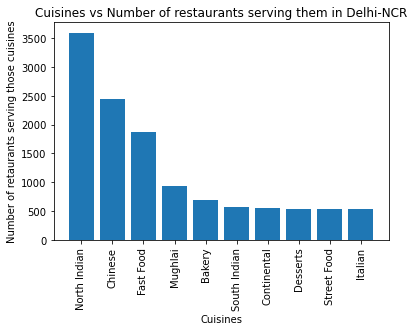

In [7]:

plt.bar(npcuisinesInDelhiNCRfromdict[0:10],nptimesCuisinesInDelhiNCRfromdict[0:10])
plt.xlabel("Cuisines")
plt.xticks(rotation="vertical")
plt.title("Cuisines vs Number of restaurants serving them in Delhi-NCR")
plt.ylabel("Number of retaurants serving those cuisines")
plt.show()

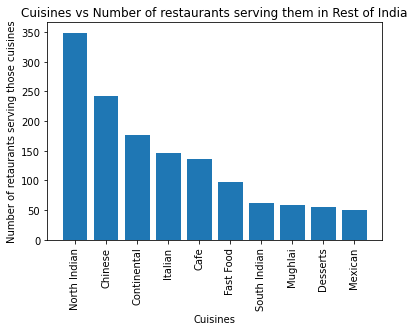

In [8]:

plt.bar(npcuisinesInROIfromdict[0:10],nptimesCuisinesInROIfromdict[0:10])
plt.xlabel("Cuisines")
plt.xticks(rotation="vertical")
plt.title("Cuisines vs Number of restaurants serving them in Rest of India")
plt.ylabel("Number of retaurants serving those cuisines")
plt.show()

#### In the following cell, I have
1. Plotted the top 10 most common cuisines which are common in both Delhi-NCR and rest of India

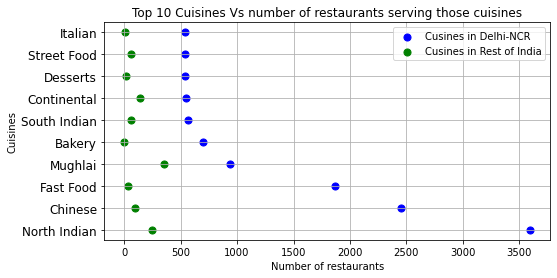

In [31]:
cuisineList = []
insideDelhiNCR = []
outsideDelhiNCR = []

for i in countDelhiCuisines.keys():
    if i in countROICuisines:
        cuisineList.append(i)
        insideDelhiNCR.append(countDelhiCuisines[i])
        outsideDelhiNCR.append(countROICuisines[i])

npcuisineList = np.array(cuisineList)
npinsideDelhiNCR = np.array(insideDelhiNCR)
npoutsideDelhiNCR = np.array(outsideDelhiNCR)

npcuisineList = npcuisineList[np.argsort(npinsideDelhiNCR)][::-1]
npinsideDelhiNCR = np.sort(npinsideDelhiNCR)[::-1]
npoutsideDelhiNCR = npoutsideDelhiNCR[np.argsort(npinsideDelhiNCR)][::-1]

plt.figure(figsize=(8, 4))
plt.scatter(npinsideDelhiNCR[0:10], npcuisineList[0:10], c='blue', s=50)
plt.scatter(npoutsideDelhiNCR[0:10], npcuisineList[0:10], c='green', s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of restaurants')
plt.ylabel('Cuisines')
plt.title('Top 10 Cuisines Vs number of restaurants serving those cuisines')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

#### Observation
From the above 3 graphs we can see that the North Indian cuisine has aced it by being #1 from both locations inside and outside Delhi-NCR.
Chinese cuisine has #2 position. Some other common cuisines that made into top 10 are fast food, street food, desserts and bakery amoung others.
#### Analysis
Hindi being national language of India, north Indian cuisine becoming #1 cuisine is no big surprise. Chinese cuisines have been in our country for more than two decades. The availability of street foods at almost all major localities have benifited them in entering in the top 10 game.
New restaurants can obviosly open their business with these two cuisines. They can also attract more customers by simply expanding their menu to bakery and desserts.

### 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference

#### In the following cell, I have
1. Initialised 2 sets with sets of numpy array(npcuisinesInDelhiNCRfromdict,npcuisinesInROIfromdict)
2. Created a list for cuisines available only inside Delhi-NCR
3. Created a list for cuisines available only outside Delhi-NCR
4. Printed both the lists by itrating over them separatly, also added its corresponding number of restaurants where that cuisine is availabe(to 2 separate lists - for inside and outside Delhi-NCR). 

In [26]:
setnpcuisinesInDelhiNCRfromdict = set(npcuisinesInDelhiNCRfromdict)
setnpcuisinesInROIfromdict = set(npcuisinesInROIfromdict)

insideDelhiOnlyCui = []
outsideDelhiOnlyCui = []
insideDelhiOnlyRes = []
outsideDelhiOnlyRes = []

insideDelhiOnlyCui = list(setnpcuisinesInDelhiNCRfromdict-setnpcuisinesInROIfromdict)
outsideDelhiOnlyCui = list(setnpcuisinesInROIfromdict-setnpcuisinesInDelhiNCRfromdict)

print('Cuisines present in Restaurants of Delhi-NCR but not present in Rest of India are:')
for cuisine in (insideDelhiOnlyCui):
    print(cuisine,'present in',countDelhiCuisines[cuisine],'restaurants')
    insideDelhiOnlyRes.append(countDelhiCuisines[cuisine])

print()
print('Cuisines present in Restaurants outside of Delhi-NCR but not present in Delhi-NCR are:')
for cuisine in (outsideDelhiOnlyCui):
    print(cuisine,'present in',countROICuisines[cuisine],'restaurants')
    outsideDelhiOnlyRes.append(countROICuisines[cuisine])

Cuisines present in Restaurants of Delhi-NCR but not present in Rest of India are:
Naga present in 8 restaurants
Iranian present in 3 restaurants
Pakistani present in 2 restaurants
Assamese present in 4 restaurants
Persian present in 1 restaurants
Cuisine Varies present in 1 restaurants
Belgian present in 1 restaurants
Raw Meats present in 114 restaurants
Moroccan present in 5 restaurants
Bihari present in 6 restaurants
Sri Lankan present in 1 restaurants
Nepalese present in 9 restaurants
Oriya present in 2 restaurants
Sushi present in 21 restaurants
Drinks Only present in 2 restaurants
South American present in 2 restaurants
Deli present in 1 restaurants
Afghani present in 11 restaurants
Kashmiri present in 20 restaurants
Turkish present in 8 restaurants

Cuisines present in Restaurants outside of Delhi-NCR but not present in Delhi-NCR are:
Malwani present in 1 restaurants
BBQ present in 1 restaurants
German present in 2 restaurants
Cajun present in 1 restaurants


#### In the following cell, I have
1. Plotted a bar graph for cuisines only in Delhi-NCR

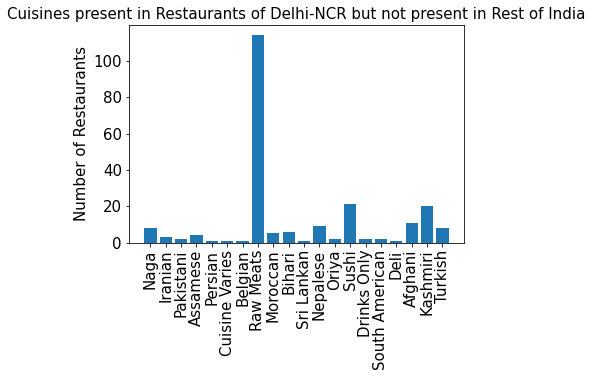

In [27]:
plt.bar(insideDelhiOnlyCui,insideDelhiOnlyRes)
plt.ylabel('Number of Restaurants',fontsize=15)
plt.title('Cuisines present in Restaurants of Delhi-NCR but not present in Rest of India',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()



#### In the following cell, I have
1. Plotted a bar graph for cuisines only outside Delhi-NCR

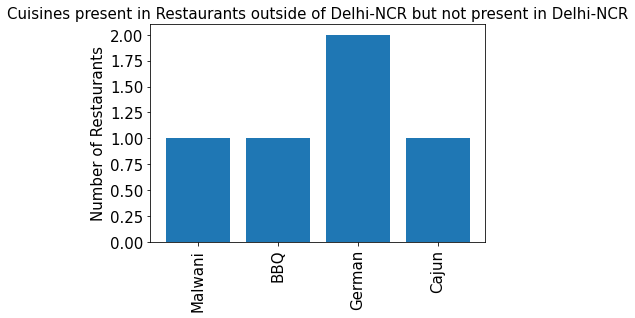

In [30]:
plt.bar(outsideDelhiOnlyCui,outsideDelhiOnlyRes)
plt.ylabel('Number of Restaurants',fontsize=15)
plt.title('Cuisines present in Restaurants outside of Delhi-NCR but not present in Delhi-NCR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

#### Observation
From the above two graphs we can see that the there are 20 cuisines that are only available in Delhi-NCR while there are only 4 cuisines that are available only oustides of Delhi-NCR.
#### Analysis
Delhi is the capitol of India. Delhi obviosly has a wide range of cuisines to offer. From the above graphs we can infer that "North Indian" cusinie is the most popular among restaurants of
Delhi_NCR as well as other states. Here I have plotted only those 30 important cusinies which are common in
both Delhi-NCR and other states. There are some cusinies present in other states and are not present in any
restaurant of Delhi-NCR. After North Indian cusinie we have chinese cusinie with 2448 restaurants in Delhi-NCR
and 242 in other states of india. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in
other states(a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in
the states other than Delhi-NCR. And there are many more cusinies as shown in the graph.
